In [3]:
import pythtb.pythtb as tb

/home/fes33/Documents/GIK - R&D/Personal - Papers and Reports/--Libraries/abinit/Abinitio-Codes/src/pythtb/pythtb.py:110: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if lat is 'unit' or lat is None:
/home/fes33/Documents/GIK - R&D/Personal - Papers and Reports/--Libraries/abinit/Abinitio-Codes/src/pythtb/pythtb.py:130: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if orb is 'bravais' or orb is None:


## Basic

---------------------------------------
report of tight-binding model
---------------------------------------
k-space dimension           = 2
r-space dimension           = 2
number of spin components   = 1
periodic directions         = [0, 1]
number of orbitals          = 2
number of electronic states = 2
lattice vectors:
 #  0  ===>  [     1.0 ,     0.0 ]
 #  1  ===>  [     0.5 ,   0.866 ]
positions of orbitals:
 #  0  ===>  [  0.3333 ,  0.3333 ]
 #  1  ===>  [  0.6667 ,  0.6667 ]
site energies:
 #  0  ===>      -0.0
 #  1  ===>       0.0
hoppings:
<  0 | H |  1 + [  0 ,  0 ] >     ===>     -1.0 +     0.0 i
<  1 | H |  0 + [  1 ,  0 ] >     ===>     -2.0 +     0.0 i
<  1 | H |  0 + [  0 ,  1 ] >     ===>     -3.0 +     0.0 i
hopping distances:
|  pos(  0 )  - pos(  1 + [  0 ,  0 ] ) |  =    0.5774
|  pos(  1 )  - pos(  0 + [  1 ,  0 ] ) |  =    0.5774
|  pos(  1 )  - pos(  0 + [  0 ,  1 ] ) |  =    0.5774

----- k_path report begin ----------
real-space lattice vectors
 [[1.      0.  

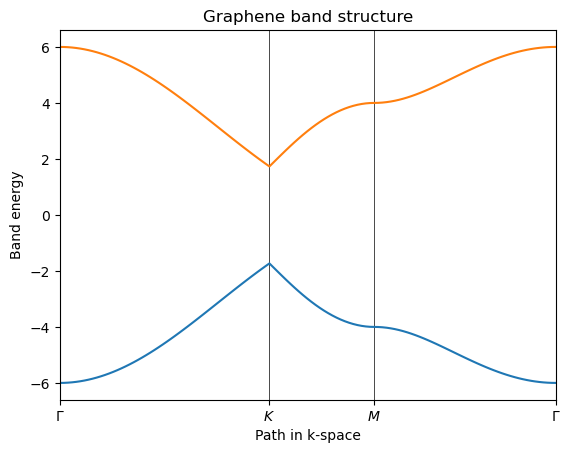

In [2]:
#!/usr/bin/env python

# Toy graphene model

# Copyright under GNU General Public License 2010, 2012, 2016
# by Sinisa Coh and David Vanderbilt (see gpl-pythtb.txt)

from __future__ import print_function
from pythtb.pythtb import * # import TB model class
import numpy as np
import matplotlib.pyplot as plt

# define lattice vectors
lat=[[1.0,0.0],[0.5,np.sqrt(3.0)/2.0]]
# define coordinates of orbitals
orb=[[1./3.,1./3.],[2./3.,2./3.]]

# make two dimensional tight-binding graphene model
my_model=tb_model(2,2,lat,orb)

# set model parameters
delta=0.0
t=-1.0

# set on-site energies
my_model.set_onsite([-delta,delta])
# set hoppings (one for each connected pair of orbitals)
# (amplitude, i, j, [lattice vector to cell containing j])
my_model.set_hop(-1, 0, 1, [ 0, 0])
my_model.set_hop(-2, 1, 0, [ 1, 0])
my_model.set_hop(-3, 1, 0, [ 0, 1])

# print tight-binding model
my_model.display()

# generate list of k-points following a segmented path in the BZ
# list of nodes (high-symmetry points) that will be connected
path=[[0.,0.],[2./3.,1./3.],[.5,.5],[0.,0.]]
# labels of the nodes
label=(r'$\Gamma $',r'$K$', r'$M$', r'$\Gamma $')
# total number of interpolated k-points along the path
nk=121

# call function k_path to construct the actual path
(k_vec,k_dist,k_node)=my_model.k_path(path,nk)
# inputs:
#   path, nk: see above
#   my_model: the pythtb model
# outputs:
#   k_vec: list of interpolated k-points
#   k_dist: horizontal axis position of each k-point in the list
#   k_node: horizontal axis position of each original node

print('---------------------------------------')
print('starting calculation')
print('---------------------------------------')
print('Calculating bands...')

# obtain eigenvalues to be plotted
evals=my_model.solve_all(k_vec)

# figure for bandstructure

fig, ax = plt.subplots()
# specify horizontal axis details
# set range of horizontal axis
ax.set_xlim(k_node[0],k_node[-1])
# put tickmarks and labels at node positions
ax.set_xticks(k_node)
ax.set_xticklabels(label)
# add vertical lines at node positions
for n in range(len(k_node)):
  ax.axvline(x=k_node[n],linewidth=0.5, color='k')
# put title
ax.set_title("Graphene band structure")
ax.set_xlabel("Path in k-space")
ax.set_ylabel("Band energy")

# plot first and second band
ax.plot(k_dist,evals[0])
ax.plot(k_dist,evals[1])

print('Done.\n')

In [5]:
# Extract the last entries from each inner list
data = hoppings

last_entries = [entry[-1] for entry in data]
unique_entries = set(map(tuple, last_entries))
num_unique = len(unique_entries)

print(num_unique)

NameError: name 'hoppings' is not defined

In [ ]:
hoppings = my_model._hoppings

for i, (hop_amp, ind_i, ind_j, ind_R) in enumerate(hoppings):
    
    print(i, )

In [ ]:
# diagonalizes Hamiltonian at some k-points
(evals, evecs) = my_model.solve_all(k_vec,eig_vectors=True)
# computes position operator matrix elements for 3-rd kpoint
# and bottom five bands along first coordinate
pos_mat = my_model.position_matrix(evecs[:5,2], 0)

## **W90**

In [1]:
import pythtb.pythtb as tb

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


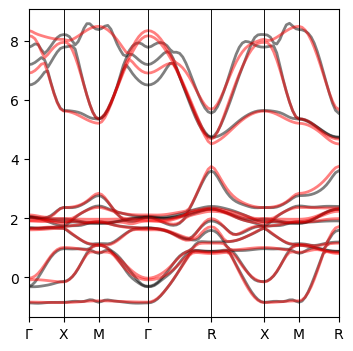

In [2]:
#!/usr/bin/env python
from pythtb import * # import TB model class
from pythtb.pythtb import *
import matplotlib.pyplot as plt


def plottb(evals,k_dist,k_node,k_label, color = 'k', label = None):
    ax = plt.gca()
    for i in range(evals.shape[0]):
        ax.plot(k_dist,evals[i],color = color, linestyle = '-', alpha = 0.5, lw = 2)

    for n in range(len(k_node)):
        ax.axvline(x=k_node[n],linewidth=0.5, color='k')

    ax.set_xlim(k_dist[0],k_dist[-1])
    ax.set_xticks(k_node)
    ax.set_xticklabels(k_label)
    # fig.tight_layout()    
    return

def modelcreate(mat, path, report, min_hopping_norm = 0.1, max_distance=None, zero_energy=0):
    my_model=mat.model(zero_energy=zero_energy, min_hopping_norm=min_hopping_norm, max_distance=max_distance);


    (k_vec,k_dist,k_node)=my_model.k_path(path,101, report = report);
    evals=my_model.solve_all(k_vec);
    return evals, k_dist, k_node

def tuneandplottb(mat, path, report, k_label, min_hopping_norm = 0.1, max_distance=None, color = 'k', label = None, zero_energy = 0):
    evals, k_dist, k_node = modelcreate(mat, path, report, min_hopping_norm = min_hopping_norm, max_distance=max_distance, zero_energy= zero_energy)
    plottb(evals,k_dist,k_node, k_label, color = color, label = label)    

    return


folderfile = ["CsPbBr3", "CsPbBr2I", "CsPbBrI2","CsPbI3"]

lattice = [5.9, 6.3, 6.2 , 6.2]
efermi  = [1.9671, 3.1106, 4.2752, 3.6711]

ind = 2

mhn_a, mhn_b = 0.001, 0.033

# -----------------

mat=w90(rf"../../_data/wann_tb_files/{folderfile[ind]}_wan",f"{folderfile[ind]}");
path=[[0,0,0], [0.0,0.5, 0.0],[0.5,0.5,0.0], [0.,0.,0.0], [0.5, 0.5, 0.5], [0,0.5,0], [0.5,0.5,0], [0.5,0.5,0.5]]
report = False
k_label=(r'$\Gamma$', r'X',r'M', r'$\Gamma$', r'R',r'X',r'M',r'R')

fig, ax = plt.subplots(figsize = [4,4])
tuneandplottb(mat, path, report, k_label, min_hopping_norm = mhn_a, max_distance=None, color = 'k', label = 0.0001)
tuneandplottb(mat, path, report, k_label, min_hopping_norm = mhn_b, max_distance=1.5*lattice[ind], color = 'r', label = 0.07)

plt.legend(frameon=True, loc = 'lower right', facecolor = '#FFFFFF', framealpha = 0.93, edgecolor = 'white', ncol = 2)

plt.show()

In [ ]:
import itertools
itertoo

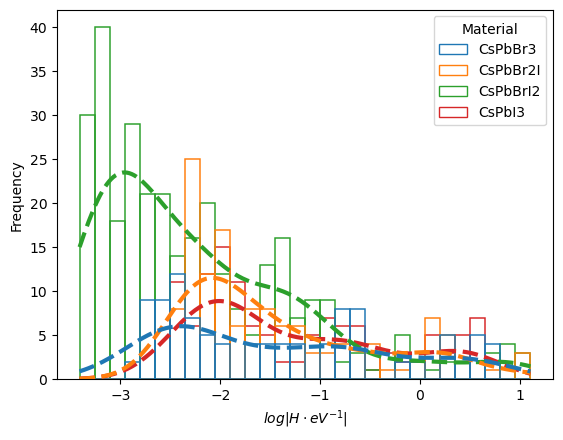

In [148]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Load the data from the TSV file
import itertools
import pandas as pd

files = ['CsPbBr3', 'CsPbBr2I', 'CsPbBrI2', 'CsPbI3']
color = itertools.cycle(['red', 'green', 'blue', 'lightgray'])

all_hops = []

df = pd.DataFrame()
for f in files:
  data = np.loadtxt(f'../../_data/wann_tbred_files/{f}.tsv', delimiter='\t')

  # Extract the last two columns (real and imaginary parts)
  real_part = data[:, -2]
  imaginary_part = data[:, -1]

  # Compute the absolute values
  absolute_values = np.sqrt(real_part**2 + imaginary_part**2)

  # If you want a 1D array
  absolute_values_1d = np.log(absolute_values.flatten())
  dftemp = pd.DataFrame(absolute_values_1d, columns = ['Value'])
  dftemp['Material'] = f

  df = pd.concat([df, dftemp], ignore_index=True)




  
sns.histplot(data = df, x = 'Value', bins=30, edgecolor = 'white', alpha =1,
            line_kws={'color': 'crimson', 'lw': 3, 'ls':'--'}, fill = None,
            kde=True, hue = 'Material')  # You can adjust the number of bins


plt.xlabel(r'$log |H\cdot eV^{-1}|$')
plt.ylabel('Frequency')
plt.show()


In [66]:
df[df.index.duplicated()]

,Value,Material
0,-0.565611,CsPbBr2I
1,-1.423692,CsPbBr2I
2,-1.520424,CsPbBr2I
3,-1.731046,CsPbBr2I
4,0.052048,CsPbBr2I
...,...,...
115,0.127927,CsPbI3
116,0.100368,CsPbI3
117,0.311042,CsPbI3
118,0.566037,CsPbI3


In [13]:
#!/usr/bin/env python

# Copyright under GNU General Public License 2010, 2012, 2016
# by Sinisa Coh and David Vanderbilt (see gpl-pythtb.txt)

from pythtb import * # import TB model class
import matplotlib.pyplot as plt

# read output from Wannier90 that should be in folder named "example_a"
#   see instructions above for how to obtain the example output from
#   Wannier90 for testing purposes
silicon=w90(r"example",r"CsPBI3");

# solve model on a path and plot it
path=[[0,0,0], [0.0,0.5, 0.0],[0.5,0.5,0.0], [0.,0.,0.0], [0.5, 0.5, 0.5], [0,0.5,0], [0.5,0.5,0], [0.5,0.5,0.5]]
k_label = list('abcdedfg')

# get tight-binding model without hopping terms above 0.01 eV
fig, ax = plt.subplots()

for col, hop in zip(['red', 'blue'], [0.001, 0.01]):
  my_model=silicon.model(min_hopping_norm=hop);

  # call function k_path to construct the actual path
  (k_vec,k_dist,k_node)=my_model.k_path(path,101);
  #
  evals=my_model.solve_all(k_vec);
  for i in range(evals.shape[0]):
      ax.plot(k_dist,evals[i], c = col)


for n in range(len(k_node)):
    ax.axvline(x=k_node[n],linewidth=0.5, color='k')
ax.set_xlabel("Path in k-space")
ax.set_ylabel("Band energy (eV)")
ax.set_xlim(k_dist[0],k_dist[-1])
ax.set_xticks(k_node)
ax.set_xticklabels(k_label)
fig.tight_layout()
fig.savefig("silicon_quick.pdf")

FileNotFoundError: [Errno 2] No such file or directory: 'example/CsPBI3.win'

In [ ]:
my_model.display()

## Dist_hop

In [1]:
from __future__ import print_function
from pythtb import * # import TB model class
from pythtb.pythtb import *
import matplotlib.pyplot as plt

from jhr.plotters._base import makeplot

root = '../../_data/wann_tb_files/'

folderfile = [("CsPbI3_wan","CsPbI3"), ("CsPbBr2I_wan", "CsPbBr2I"), ("CsPbBrI2_wan", "CsPbBrI2"), ("CsPbBr3_wan", "CsPbBr3")]
folderfile = [("CsPbI3_wan","CsPbI3"), ("CsPbBr2I_wan", "CsPbBr2I"), ("CsPbBr3_wan", "CsPbBr3")]
folderfile = [(root + x , y) for (x,y) in folderfile]

# label = ["CsPbI3", "CsPbBr2I", "CsPbBrI2"]
label = [y for (_, y) in folderfile ]
lattice = [6.2192, 6.03,  6, 5.9]
efermi = [4.4465, 4.405, 5.7132, 3.6711]
alpha = [0.7, 0.7, 0.7, 0.7]

fig, ax = plt.subplots()

for f, ef, lab, lat, al in zip(folderfile, efermi, label, lattice, alpha):
  mat=w90(f[0], f[1])

  (dist,ham) = mat.dist_hop()
  print(ham.shape)

  sample_size = 30000
  dist = np.random.choice(dist, size=sample_size, replace=False)
  ham = np.random.choice(ham, size=sample_size, replace=False)

  cutoffind = np.where(dist < 1.5 * lat)[0]
  # cutoffind = np.where(np.log(np.abs(ham)) > -4)
  # cutoffind = np.where((np.log(np.abs(ham)) > -4) & (dist < 2 * lat))
  dist2 = dist[cutoffind]
  ham2 = ham[cutoffind]
  dist2 = dist2/lat


  # print(len(cutoffind))

  ax.scatter(dist2,np.log(np.abs(ham2)), alpha = al, label = lab)
  makeplot(plt.plot, {})


  ax.set_xlabel("Distance (A)")
  ax.set_ylabel(r"$\log H$ (eV)")
  plt.legend(frameon = False)


plt.show()

/home/fes33/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


ImportError: cannot import name 'docstring' from 'matplotlib' (/home/fes33/.local/lib/python3.10/site-packages/matplotlib/__init__.py)

In [ ]:
mat_s = mat.model(min_hopping_norm =1)
mat_s.display()

## Model from Scratch

In [ ]:
## 3D Model

In [ ]:
dimr, dimk = 3, 3

pos = {'Pb':[[0.5, 0.5, 0.5], [0.5, 0.5, 0.5],[0.5, 0.5, 0.5],[0.5, 0.5, 0.5]],
       'X1': [[0.5, 0.5, 0],[0.5, 0.5, 0],[0.5, 0.5, 0],[0.5, 0.5, 0]],
       'X2':[[0.5, 0, 0.5],[0.5, 0, 0.5],[0.5, 0, 0.5],[0.5, 0, 0.5]],
       'X3':[ [0, 0.5, 0.5],[0, 0.5, 0.5],[0, 0.5, 0.5],[0, 0.5, 0.5]]}

a = 6.408627785
lat = [[a, 0.0, 0.0], [0,a,0], [0,0,a]]
orb = [*pos['Pb'], *pos['X1'],*pos['X2'],*pos['X3']]

x = tb.tb_model(dimk, dimr, lat, orb)

Pb_enS = 0.8
Pb_enP = 0.8

X_enS = 0.8
X_enP = 0.8

#Model Matrix
m = {'OS':{'Pb': [Pb_enS, Pb_enP, Pb_enP, Pb_enP],
                  'X1': [X_enS, X_enP, X_enP, X_enP],
                  'X2': [X_enS, X_enP, X_enP, X_enP],
                  'X3': [X_enS, X_enP, X_enP, X_enP]
                  },
     'HO':{'000': {},
           '10': {},
           ''

           }
     }


indices = [('Pb', 0),('X1', 4), ('X2',8), ('X3',12)]

#_________Set onsite energies__________
for at, ind in indices:
  for i, ons in enumerate(m['OS'][at]):
    x.set_onsite(ons, ind_i = i + ind) # Pb onsite

#________Set hopping________________










In [ ]:
atorbs = [at+orb for at in ['Pb', 'X1', 'X2', 'X3' ] for orb in ['s', 'px', 'py', 'pz'] ]
basis = {at: i for at, i in zip(atorbs, range(len(atorbs)))}

l = []
matrix = np.array([[f'{row}-{col}' for col in basis] for row in basis])

import pandas as pd
df = pd.DataFrame(matrix, columns = basis, index = basis)

def constraintReplace(df, what = None, by = None):
  """
  duplicate: If True replace 'what' by 'by' even if 'by' is already present in the cell.

  """

  #Constraint 1:
  #Treat all X as identical
  for rep in what:
    df.replace(rep, by, inplace=True , regex = True)



  return df

unique_values = pd.unique(df.values.ravel())
unique_values_list = unique_values.tolist()
print(len(unique_values_list))


df = constraintReplace(df, what = ['X2', 'X3'], by = 'X1')

unique_values = pd.unique(df.values.ravel())
unique_values_list = unique_values.tolist()
unique_values_list

In [ ]:
import pandas as pd

# Sample DataFrame
data = {
    'col1': ['X2', 'X1', 'X3', 'X2', 'X3'],
    'col2': ['X3', 'X2', 'X1', 'X1', 'X2'],
    'col3': ['X1', 'X2', 'X3', 'X2', 'X1']
}

df = pd.DataFrame(data)

def constraintReplace(df, what=None, by=None):
    # Replace only if 'by' (X1) is not already present in the row
    for rep in what:
        # Create a mask for rows that do not contain 'X1'
        mask = ~df.isin([by]).any(axis=1)
        # Replace 'rep' with 'by' only where mask is True
        df.loc[mask, :] = df.loc[mask, :].replace(rep, by, regex=True)
    return df

# Apply the function
df = constraintReplace(df, what=['X2', 'X3'], by='X1')

# Display the modified DataFrame
print(df)


In [ ]:
# near neighbors
# mid neighbors
# far neighbors

# Vornoi tessellation
# pymatgen


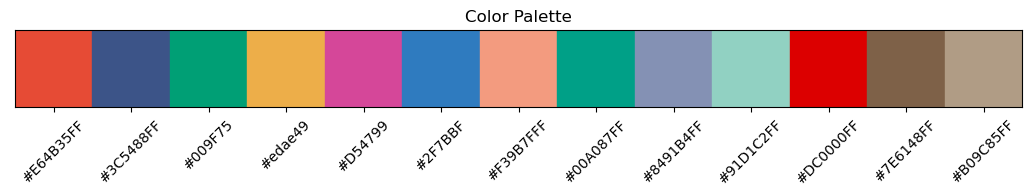

In [8]:
from jhr.plotters._aesthete import show_palette

colors = ['#E64B35FF', '#3C5488FF', '#009F75', #red, blue, green
                            '#edae49','#D54799',
                           '#2F7BBF', '#F39B7FFF','#00A087FF', '#8491B4FF', '#91D1C2FF', '#DC0000FF', '#7E6148FF', '#B09C85FF']
show_palette(colors)